## 01 base
* Experiment 03_320x454x96
* Max depth is 4500 m instead of 1000 m
* 6 hrs
* Forced with local 2 hr half-gaussian wind event (instead of a 4hr event) alongshore, upwelling favourable
* winter stratification
* Velocities at boundaries set to zero
* With sponge (12 pts, inner=86400 s, bound=3600 s, linear sponge, salt and theta sponge false)
* Output every 10 min
* Bathymetry is not smoothed

In [49]:
from netCDF4 import Dataset
import cmocean as cmo
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from matplotlib.gridspec import GridSpecFromSubplotSpec
%matplotlib inline
import numpy as np
from scipy import signal
import sys
sys.path.append('/Users/Karina/Research/SWOT-Scripps/notebooks_SVB/')
import svb_tools as svb
import warnings
warnings.filterwarnings('ignore')

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [50]:
bathy_file1 = '/Volumes/KYUUBI/SVB/03_320x454x96/01_base/gridGlob.nc'
state_file1 = '/Volumes/KYUUBI/SVB/03_320x454x96/01_base/stateGlob.nc'

### Load bathymetry variables

In [68]:
with Dataset(bathy_file1, 'r') as nbl:
    lat = nbl.variables['Y'][:]
    lon = nbl.variables['X'][:]
    Z = nbl.variables['Z'][:]
    Zl = nbl.variables['Zl'][:]
    depth = nbl.variables['Depth'][:]
    # centers mask
    hFacC = nbl.variables['HFacC'][:]
    hfac = np.ma.masked_values(hFacC, 0)
    mask = np.ma.getmask(hfac)
    # U mask
    hFacW = nbl.variables['HFacW'][:]
    hfacW = np.ma.masked_values(hFacW, 0)
    maskU = np.ma.getmask(hfacW)
    # V mask
    hFacS = nbl.variables['HFacS'][:]
    hfacS = np.ma.masked_values(hFacS, 0)
    maskV = np.ma.getmask(hfacS)
    # masked depth
    dep_masked = np.ma.masked_values(depth,0)
    mask_dep = np.ma.getmask(dep_masked)

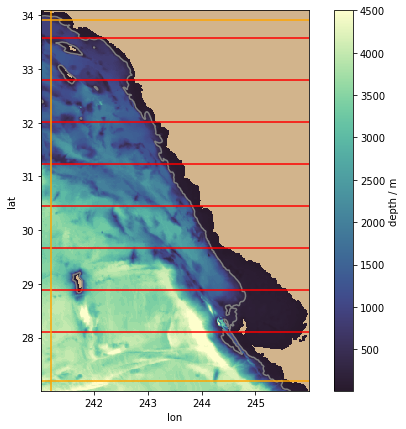

In [52]:
fig, ax = plt.subplots(1,1,figsize=(9,7))
ax.set_facecolor('tan')
pc = ax.pcolormesh(lon,lat,np.ma.masked_array(depth, mask=mask_dep), cmap=cmo.cm.deep_r)
cb = plt.colorbar(pc)
cn2 = ax.contour(lon,lat,depth, colors='0.5', levels=[250])

lon_ind = 255
lat_ind1 = 70
lat_ind2 = 120

# ssh transects
ax.plot(lon[:],lat[lat_ind1]*np.ones_like(lon),'r-')
ax.plot(lon[:],lat[lat_ind2]*np.ones_like(lon),'r-')
ax.plot(lon[:],lat[lat_ind2+50]*np.ones_like(lon),'r-')
ax.plot(lon[:],lat[lat_ind2+100]*np.ones_like(lon),'r-')
ax.plot(lon[:],lat[lat_ind2+150]*np.ones_like(lon),'r-')
ax.plot(lon[:],lat[lat_ind2+200]*np.ones_like(lon),'r-')
ax.plot(lon[:],lat[lat_ind2+250]*np.ones_like(lon),'r-')
ax.plot(lon[:],lat[lat_ind2+300]*np.ones_like(lon),'r-')

# sponge widths
ax.plot(lon[12]*np.ones_like(lat),lat[:],'-', color='orange')
ax.plot(lon[:],lat[12]*np.ones_like(lon),'-', color='orange')
ax.plot(lon[:],lat[-12]*np.ones_like(lon),'-', color='orange')

cb.set_label('depth / m')
ax.set_xlabel('lon')
ax.set_ylabel('lat')

ax.set_aspect(1)

### Surface fields

(<matplotlib.axes._subplots.AxesSubplot at 0x1a52c38650>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a52c9c3d0>)

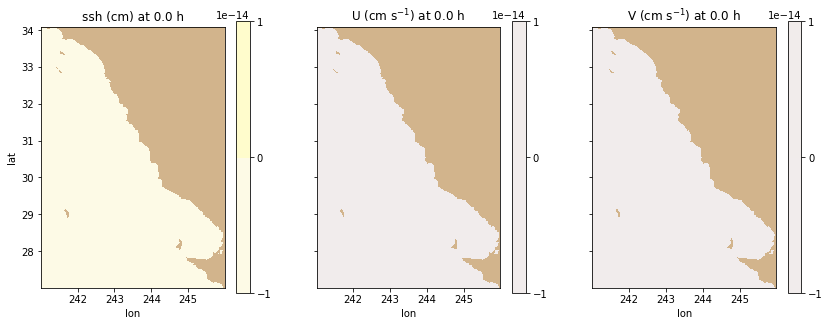

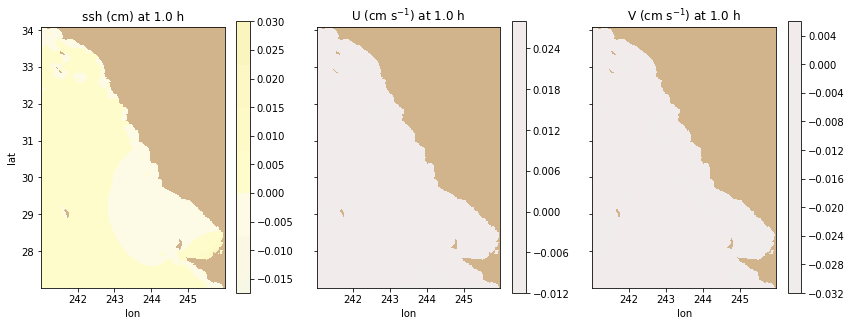

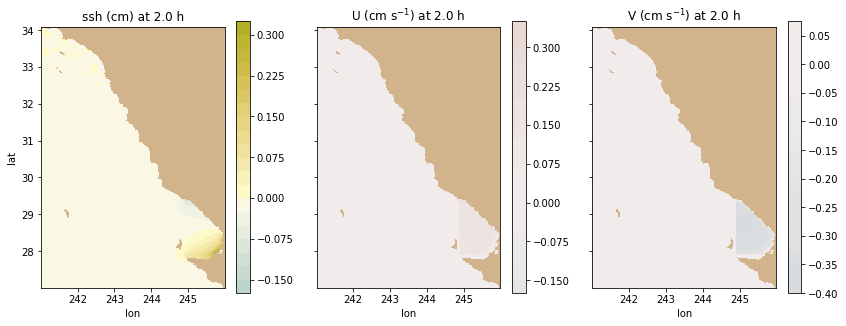

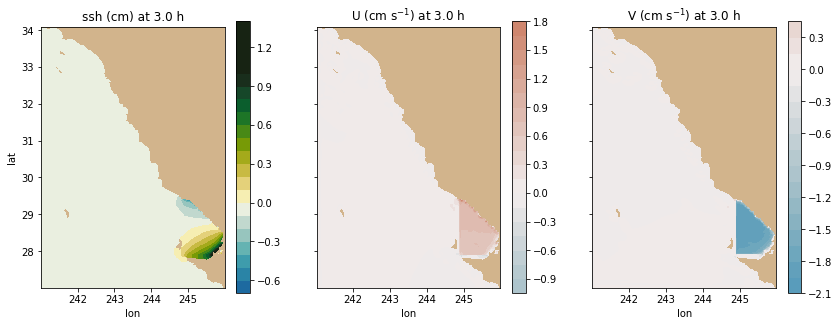

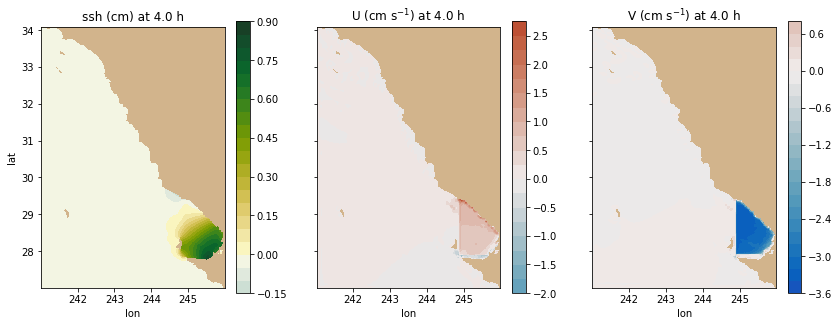

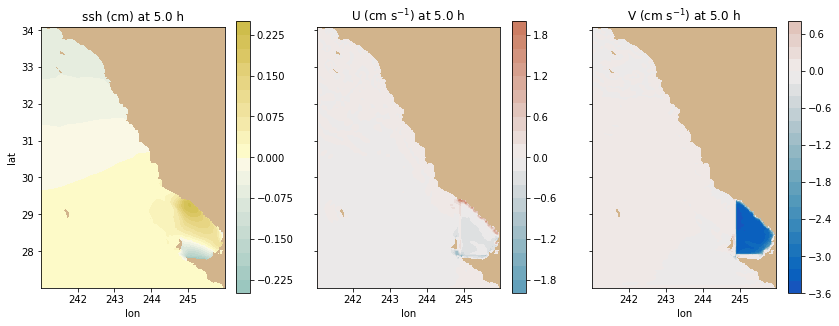

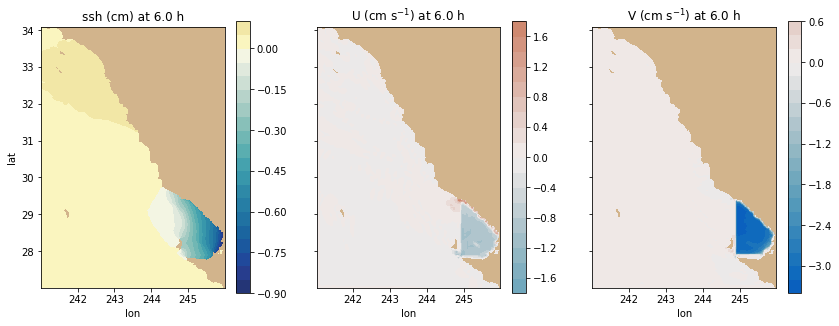

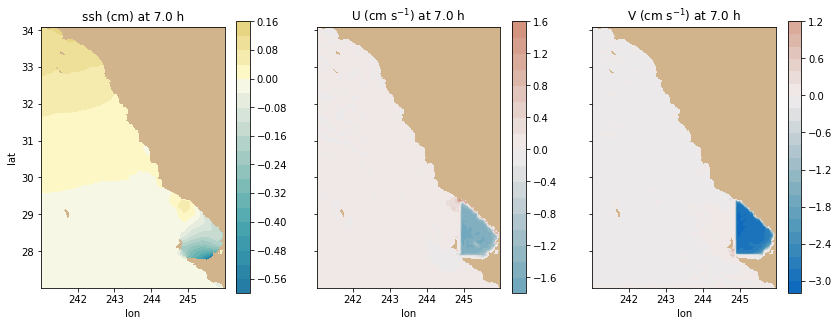

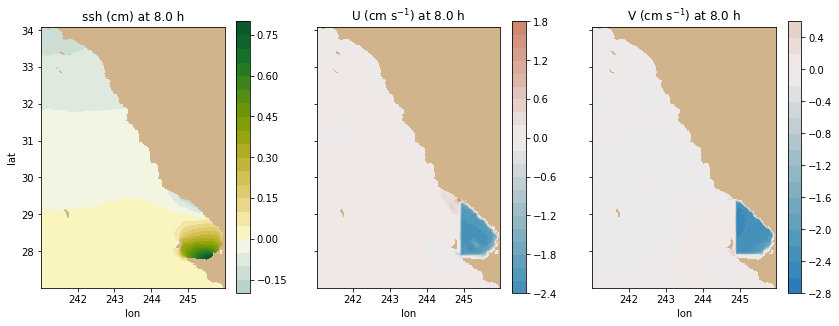

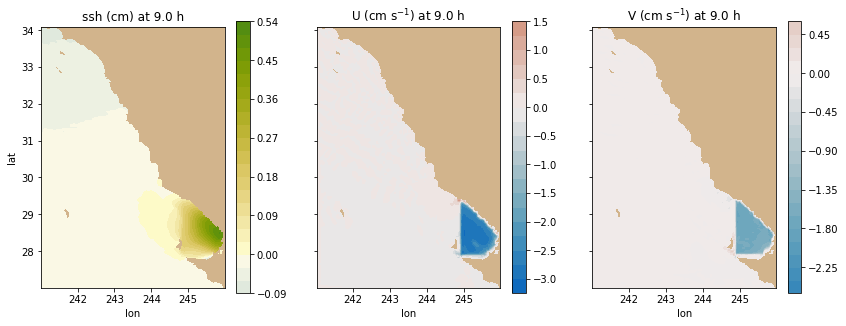

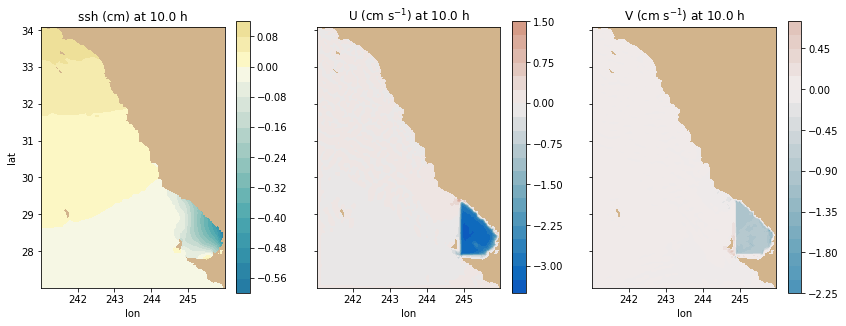

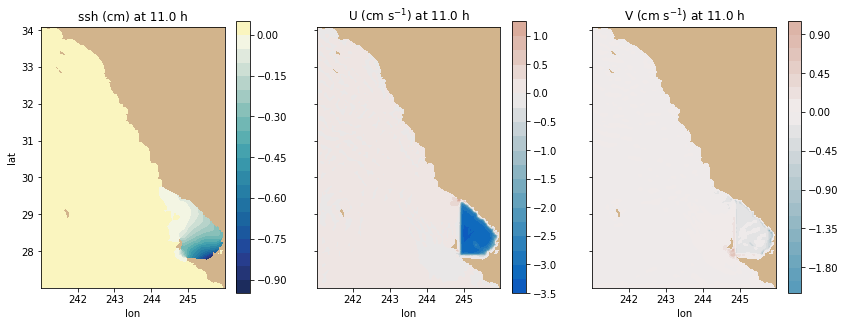

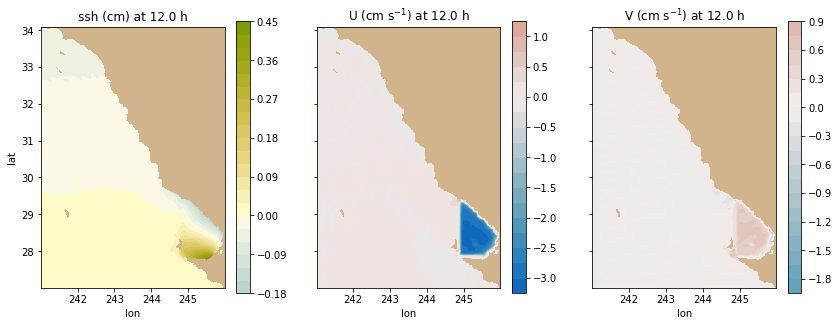

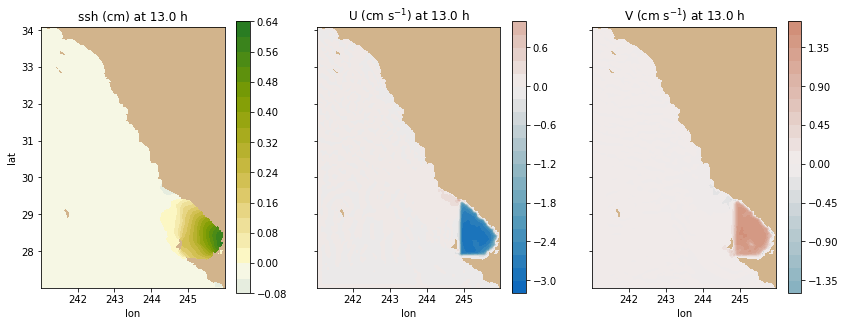

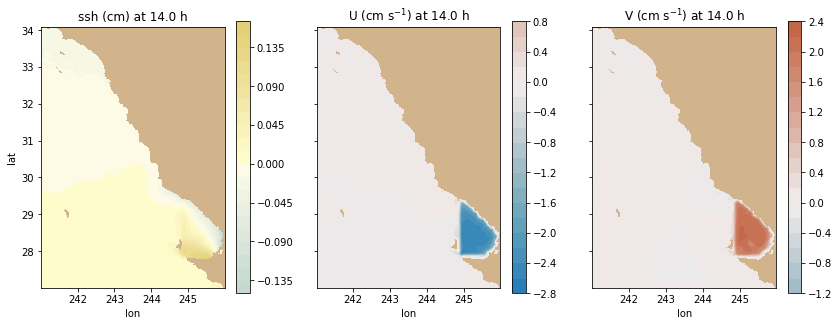

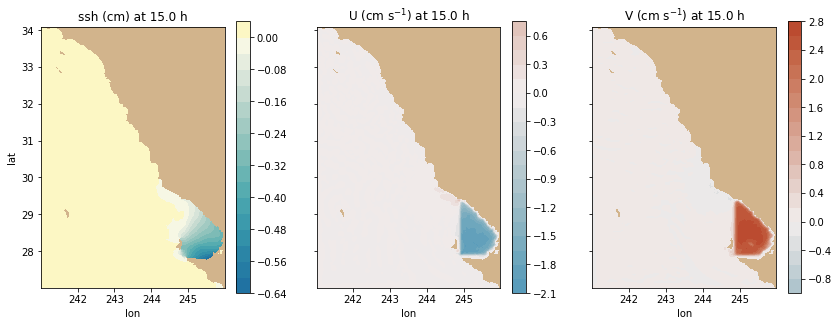

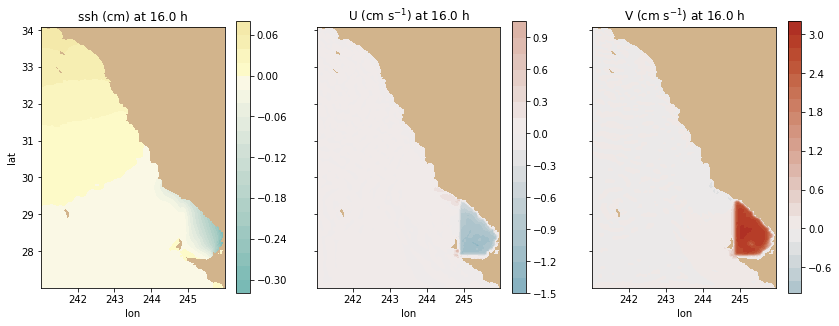

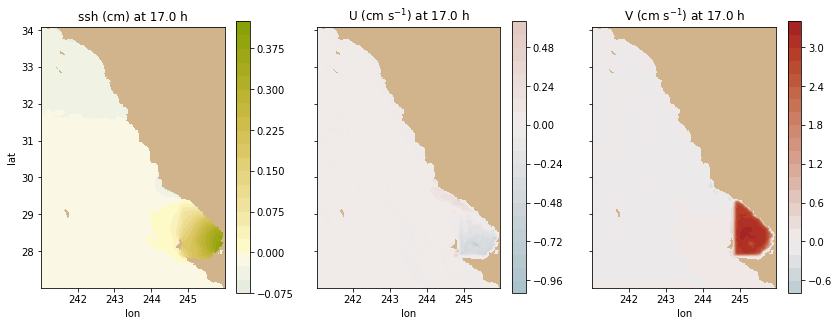

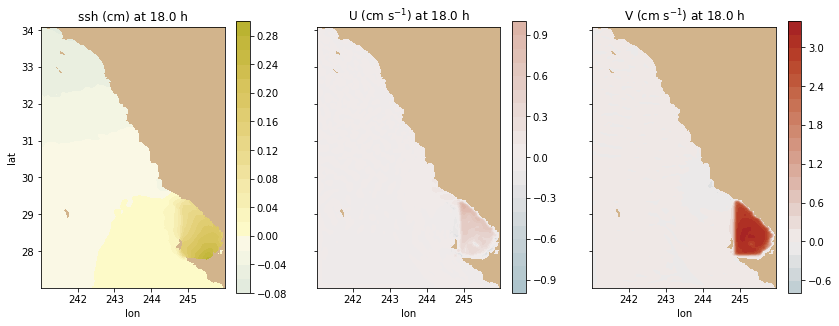

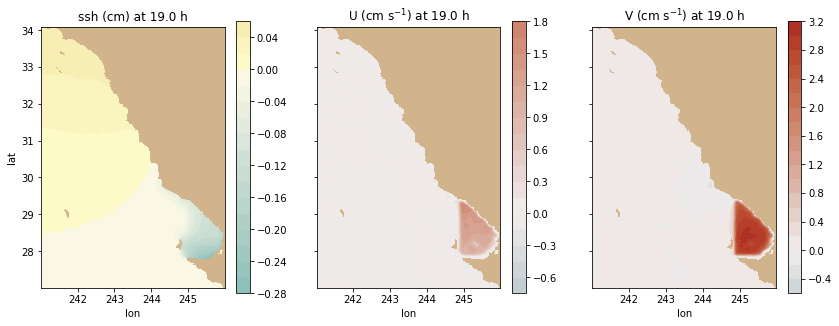

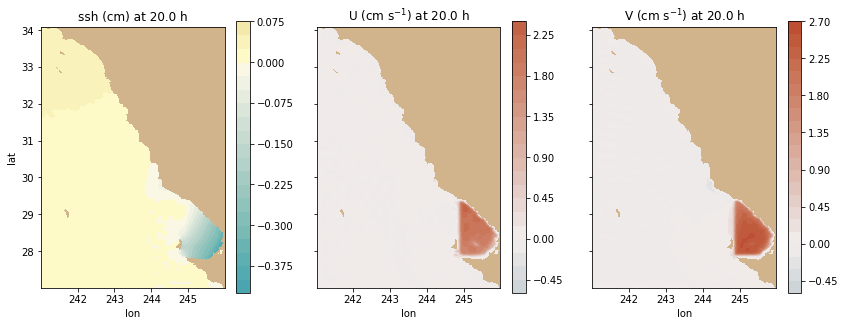

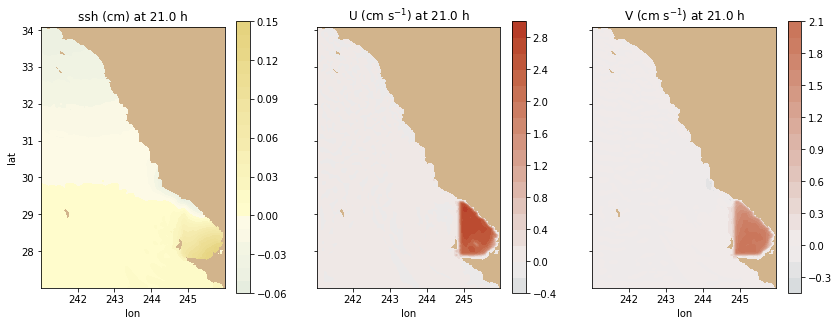

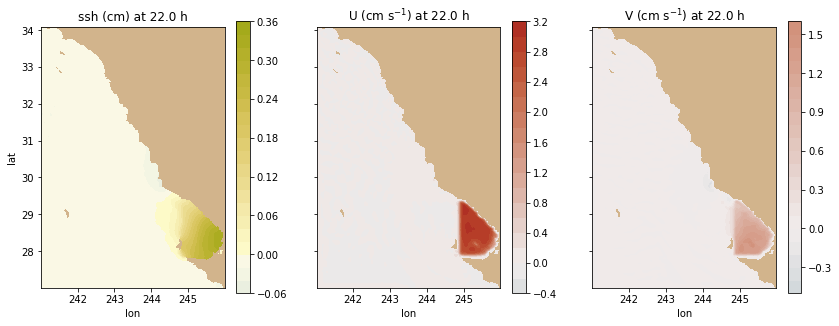

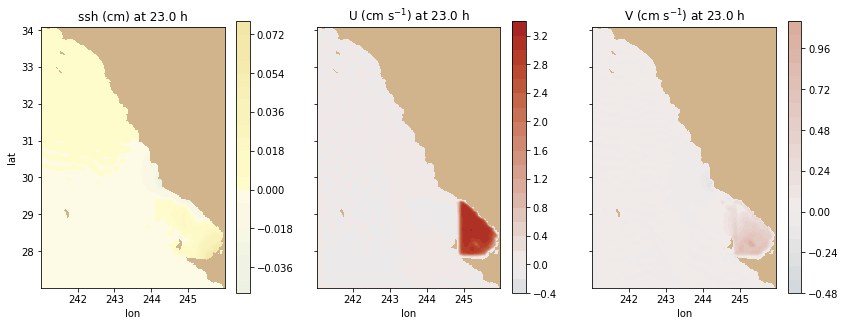

In [5]:
zz=0
state_file= state_file1
time_indexes = range(0,144,6)
svb.plot_level_vars(state_file1, lon, lat, mask, time_indexes, zz=0)

### Cross-sections along red lines in map

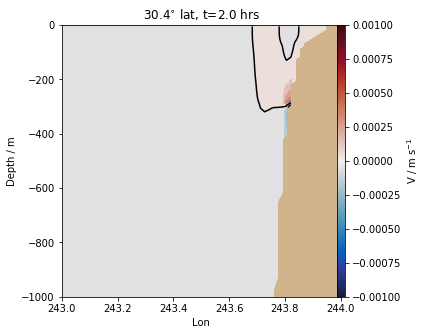

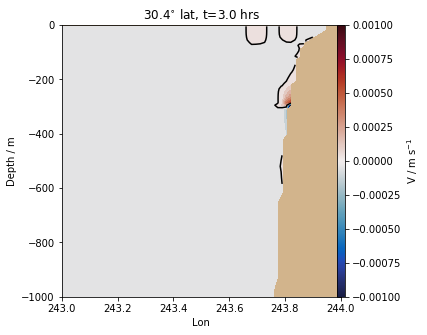

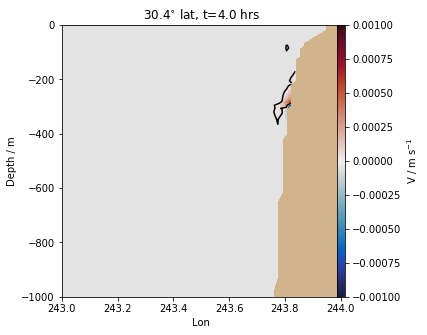

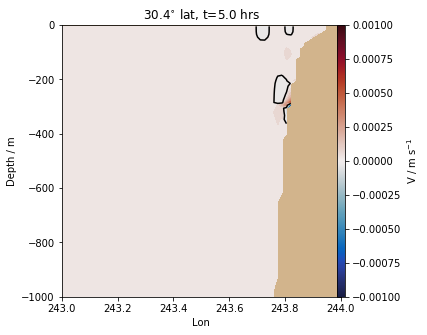

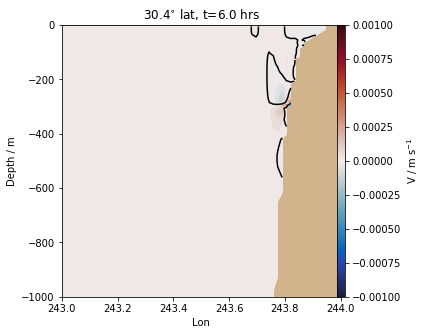

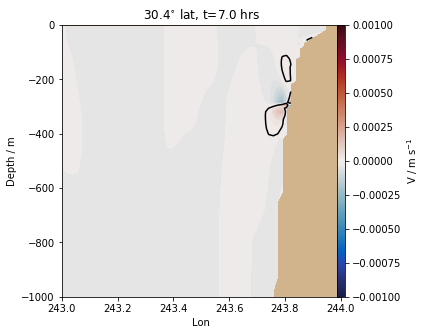

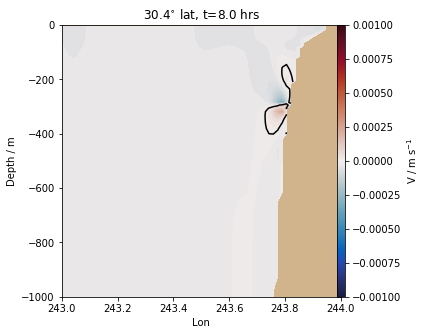

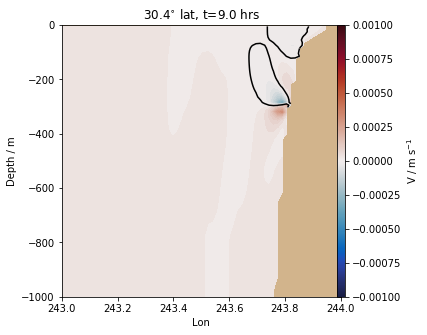

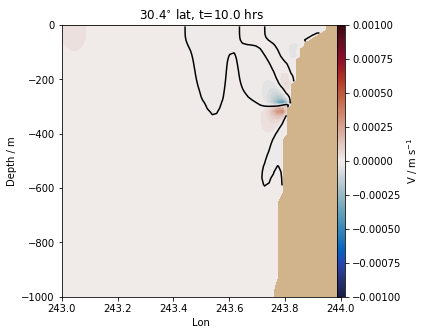

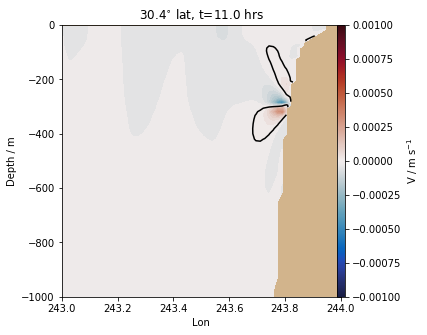

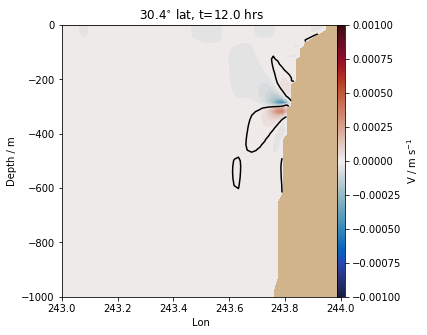

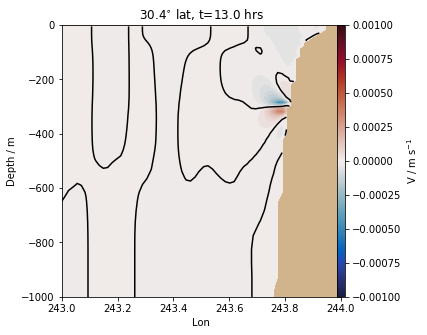

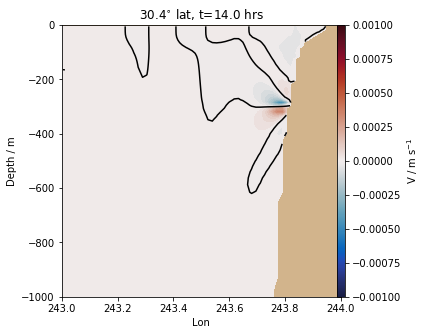

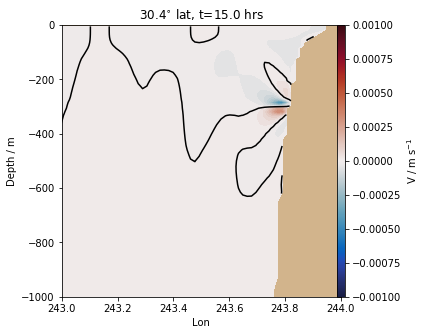

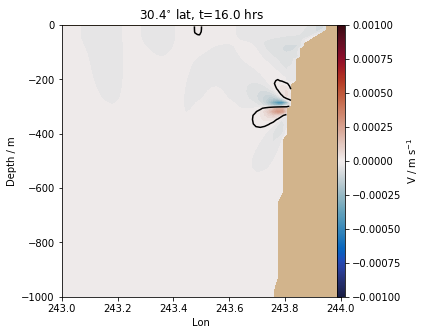

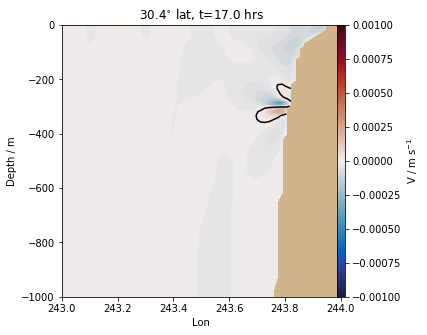

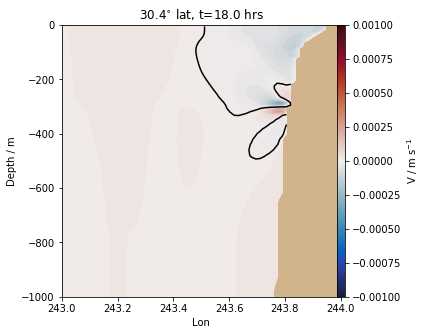

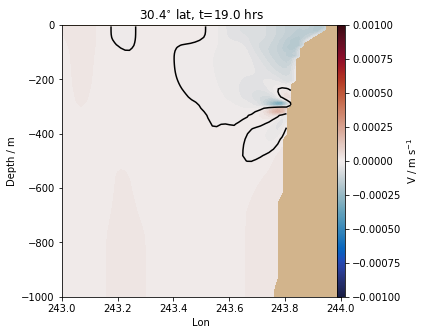

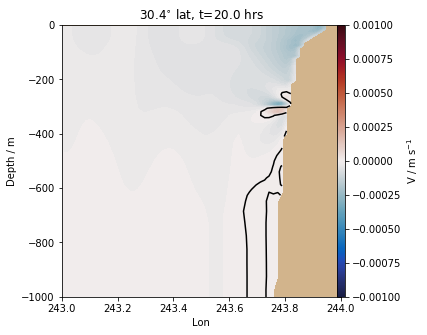

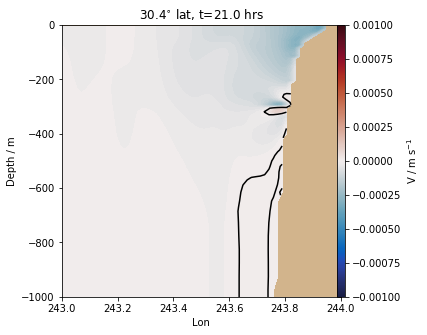

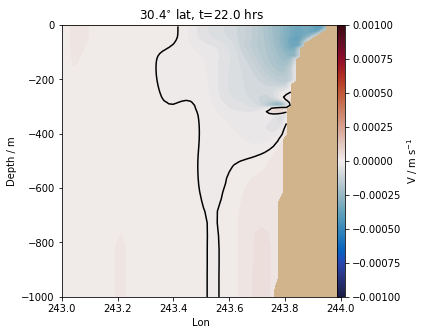

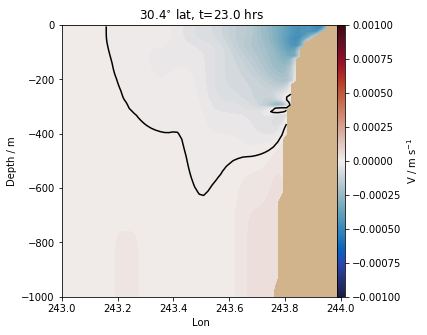

In [6]:
Tmin = -0.001
Tmax = 0.001
Tcmap = cmo.cm.balance

times = range(12,144,6)
for tt in times:
    svb.plot_zonal_CS(state_file1,lon,lat,Z,tt,lat_ind2+100,'V',r'V / m s$^{-1}$',Tcmap, 
                      Tmin, Tmax, maskV, xlim1=243., xlim2=244.0)

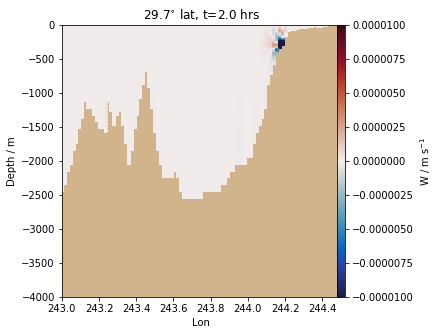

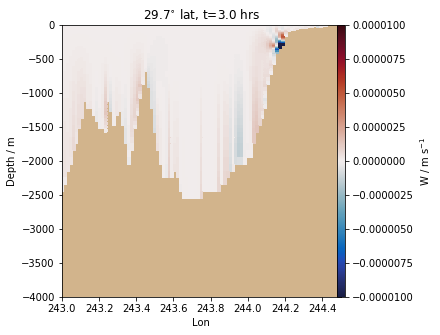

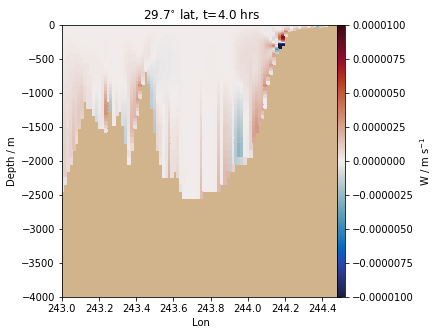

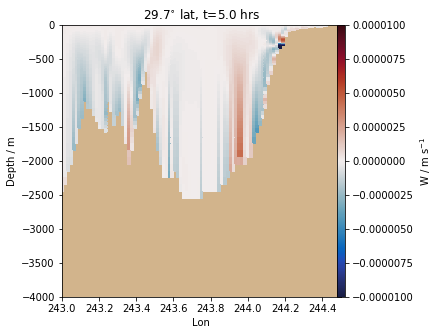

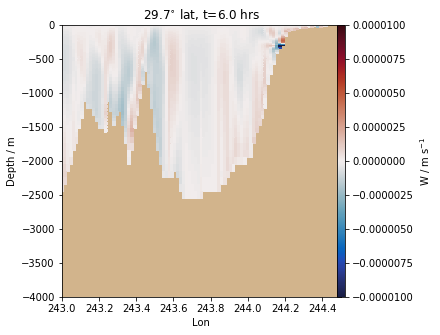

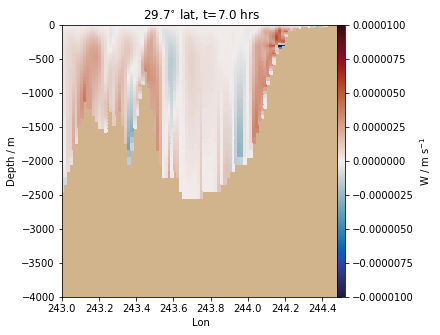

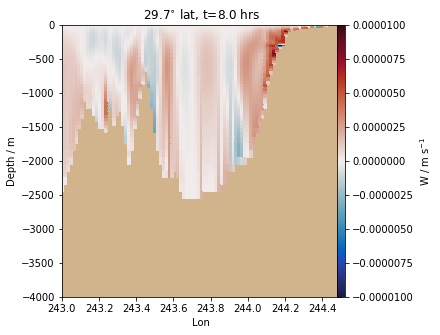

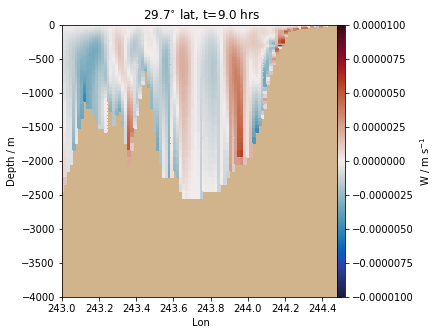

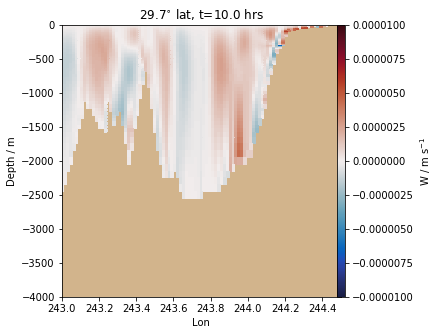

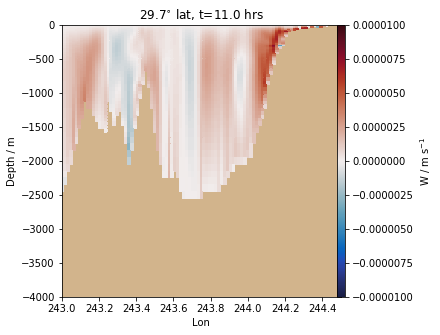

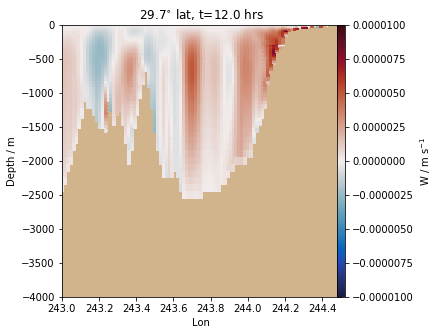

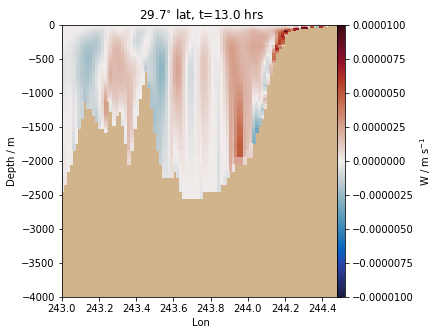

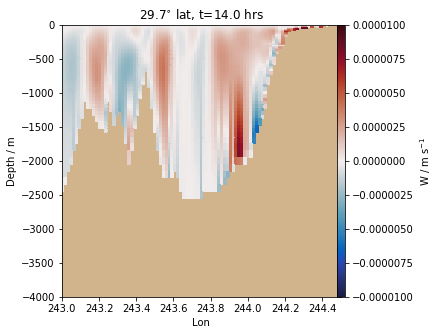

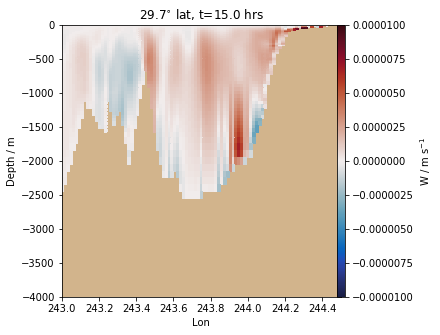

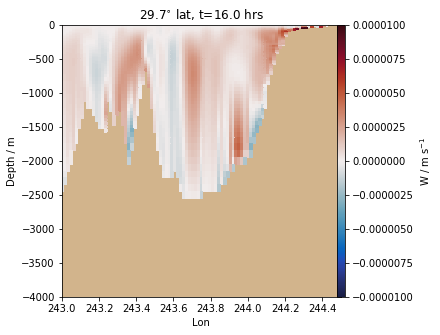

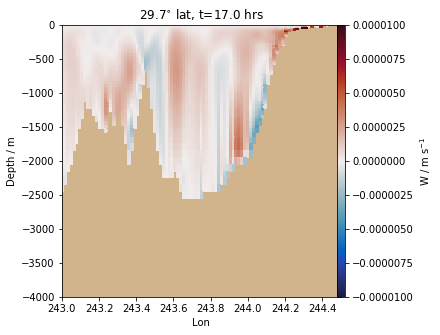

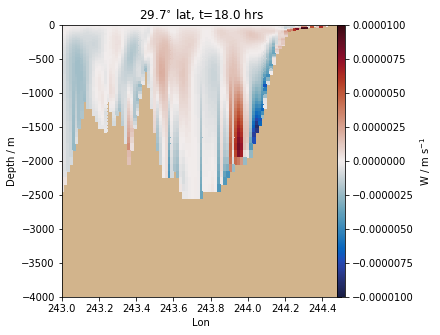

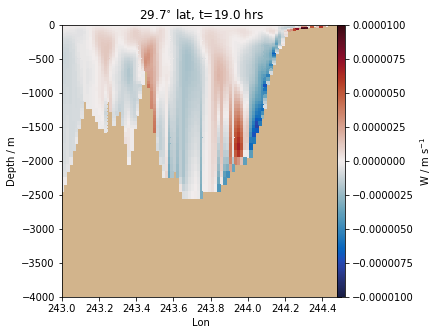

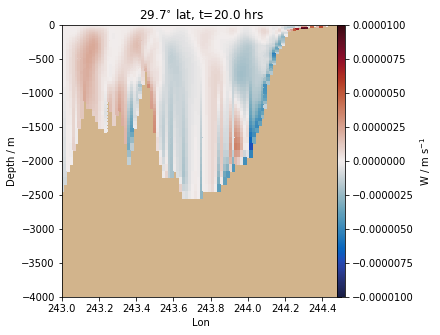

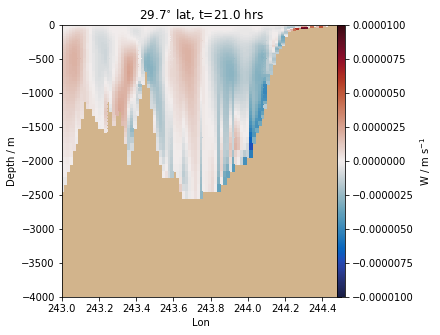

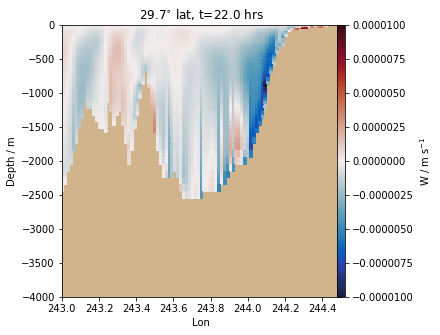

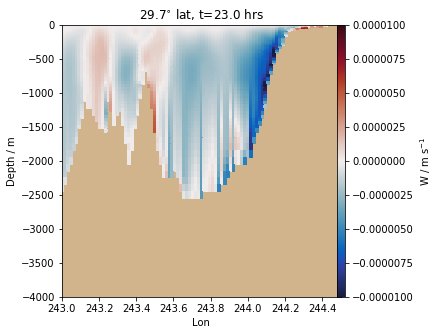

In [7]:
Tmin = -1E-5
Tmax = 1E-5
Tcmap = cmo.cm.balance

times = range(12,144,6)
for tt in times:
    ax = svb.plot_zonal_CS_pcol(state_file1,lon,lat,Z,tt,lat_ind2+50,'W',r'W / m s$^{-1}$',Tcmap, 
                                Tmin, Tmax, maskV, xlim1=243., xlim2=244.5)
    ax.set_ylim(-4000,0)

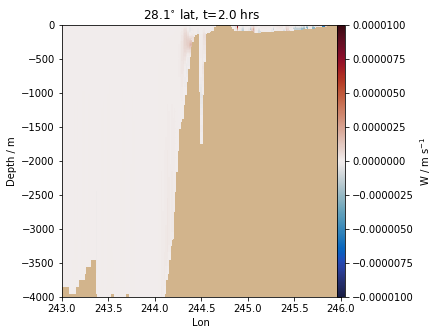

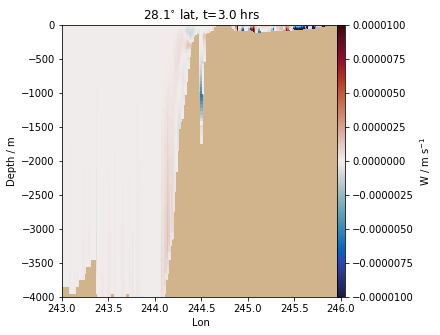

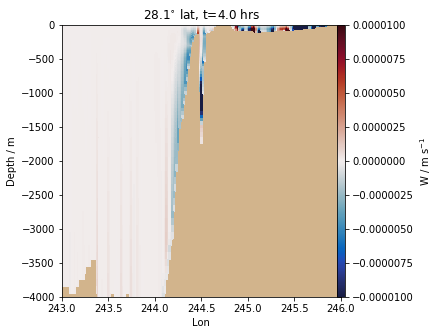

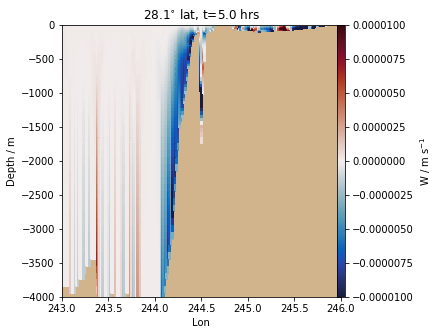

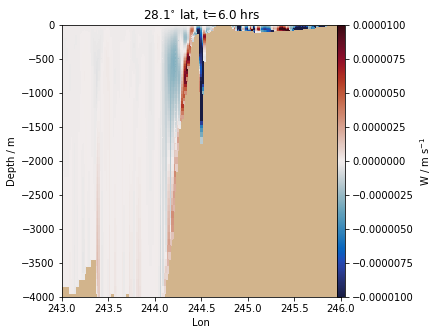

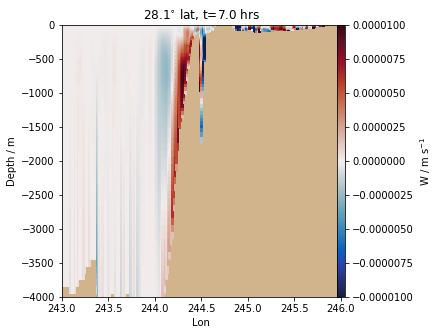

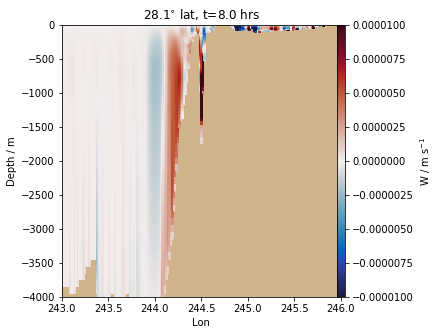

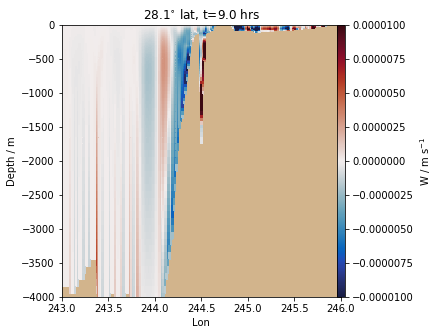

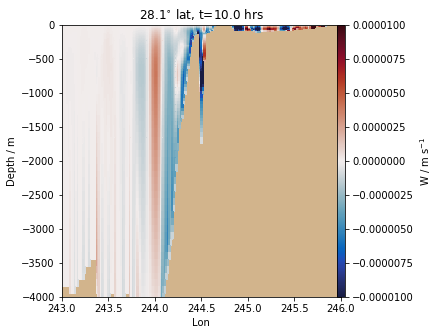

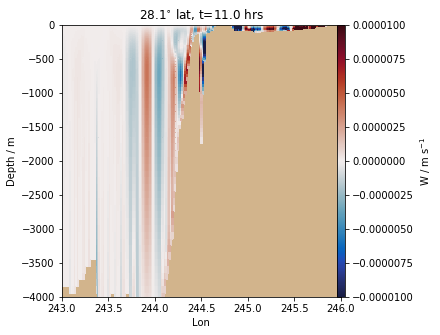

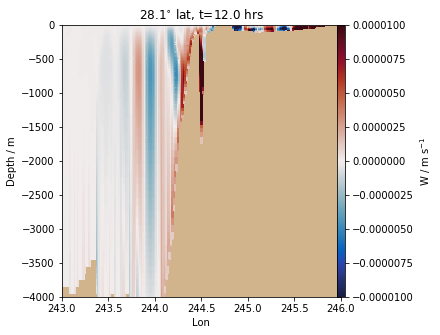

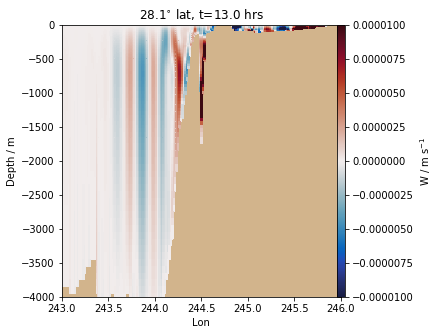

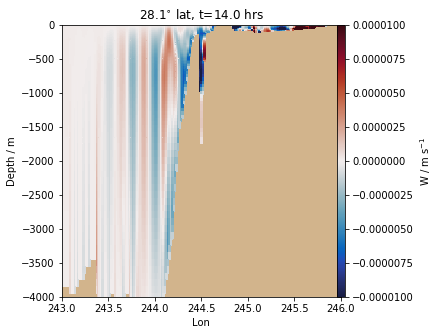

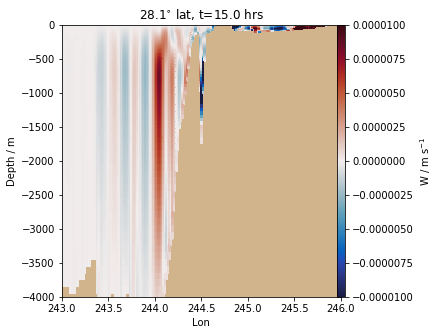

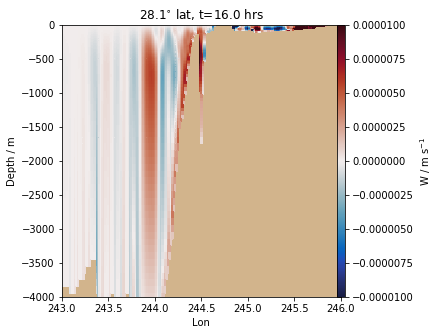

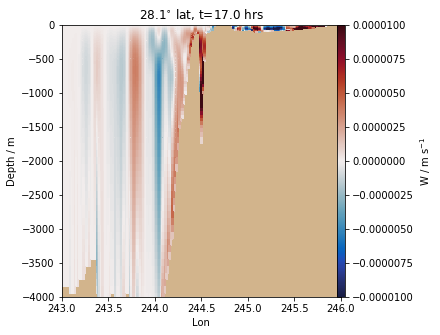

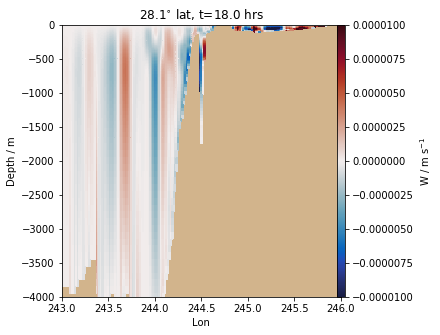

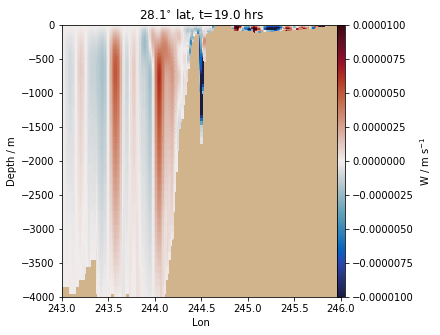

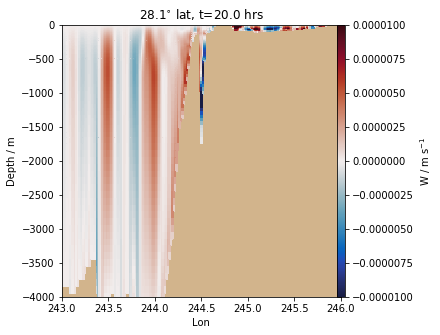

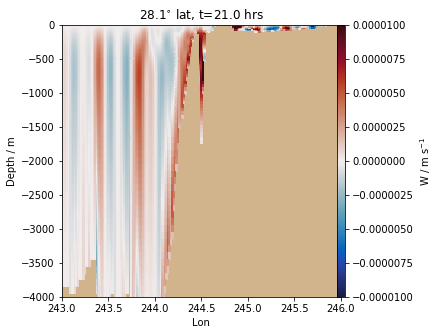

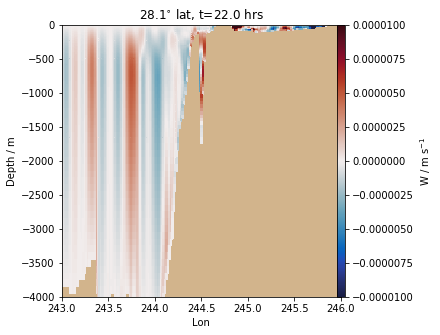

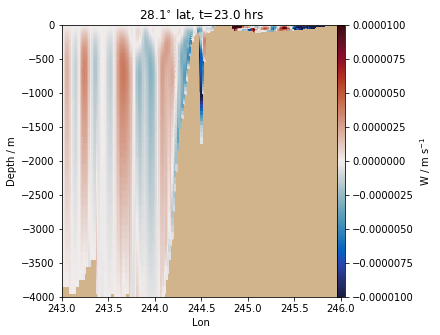

In [110]:
Tmin = -1E-5
Tmax = 1E-5
Tcmap = cmo.cm.balance

times = range(12,144,6)
for tt in times:
    ax = svb.plot_zonal_CS_pcol(state_file1,lon,lat,Z,tt,lat_ind1,'W',r'W / m s$^{-1}$',Tcmap, 
                                Tmin, Tmax, maskV, xlim1=243., xlim2=246.0)
    ax.set_ylim(-4000,0)

### Hovmoller plots

In [1]:
fig, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(2,4, figsize=(11,7), sharey=True,sharex=True)
plt.rcParams.update({'font.size': 11})

ax1.axhline(5.5, color='k', linestyle='--')
ax2.axhline(5.5, color='k', linestyle='--')
ax3.axhline(5.5, color='k', linestyle='--')
ax4.axhline(5.5, color='k', linestyle='--')
ax5.axhline(5.5, color='k', linestyle='--')
ax6.axhline(5.5, color='k', linestyle='--')
ax7.axhline(5.5, color='k', linestyle='--')
ax8.axhline(5.5, color='k', linestyle='--')

with Dataset(state_file1, 'r') as nbl:
    eta1h = nbl.variables['Eta'][:,lat_ind1,:]
    time = nbl.variables['T'][:]
    eta2h = nbl.variables['Eta'][:,lat_ind2,:]
    eta3h = nbl.variables['Eta'][:,lat_ind2+50,:]
    eta4h = nbl.variables['Eta'][:,lat_ind2+100,:]
    eta5h = nbl.variables['Eta'][:,lat_ind2+150,:]
    eta6h = nbl.variables['Eta'][:,lat_ind2+200,:]
    eta7h = nbl.variables['Eta'][:,lat_ind2+250,:]
    eta8h = nbl.variables['Eta'][:,lat_ind2+300,:]

ax1.pcolormesh(lon,time/3600,(eta1h)*100,cmap=cmo.cm.balance,vmin=-0.5, vmax=0.5)
ax2.pcolormesh(lon,time/3600,(eta2h)*100,cmap=cmo.cm.balance,vmin=-0.5, vmax=0.5)
ax3.pcolormesh(lon,time/3600,(eta3h)*100,cmap=cmo.cm.balance,vmin=-0.5, vmax=0.5)
cb = ax4.pcolormesh(lon,time/3600,(eta4h)*100,cmap=cmo.cm.balance,vmin=-0.5, vmax=0.5)
ax5.pcolormesh(lon,time/3600,(eta5h)*100,cmap=cmo.cm.balance,vmin=-0.5, vmax=0.5)
ax6.pcolormesh(lon,time/3600,(eta6h)*100,cmap=cmo.cm.balance,vmin=-0.5, vmax=0.5)
ax7.pcolormesh(lon,time/3600,(eta7h)*100,cmap=cmo.cm.balance,vmin=-0.5, vmax=0.5)
ax8.pcolormesh(lon,time/3600,(eta8h)*100,cmap=cmo.cm.balance,vmin=-0.5, vmax=0.5)

norm = mpl.colors.Normalize(vmin=-0.5, vmax=0.5)
cbar_ax = fig.add_axes([0.91, 0.125, 0.022, 0.755])
cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmo.cm.balance),
                  cax=cbar_ax, orientation='vertical', 
                  format='%1.2f',label='$\eta$ (cm)')

inds = [lat_ind1, lat_ind2,lat_ind2+50,lat_ind2+100,lat_ind2+150,
        lat_ind2+200,lat_ind2+250,lat_ind2+300]
axs = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]

for ind, ax in zip(inds, axs):
    ax.set_title(r'%1.1f$^{\circ}$ N' %lat[ind])

ax1.axvline(lon[-12], color='brown')
ax2.axvline(lon[-30], color='brown')
ax3.axvline(lon[-104], color='brown')
ax4.axvline(lon[-139], color='brown')
ax5.axvline(lon[-154], color='brown')
ax6.axvline(lon[-190], color='brown')
ax7.axvline(lon[-211], color='brown')
ax8.axvline(lon[-251], color='brown')

ax1.set_ylabel('time')
ax5.set_ylabel('time')
ax5.set_xlabel('lon')
ax6.set_xlabel('lon')
ax7.set_xlabel('lon')
ax8.set_xlabel('lon')

NameError: name 'plt' is not defined

Text(0.5, 1.0, 'Local upwelling winds, 2h ramp up - winter stratification')

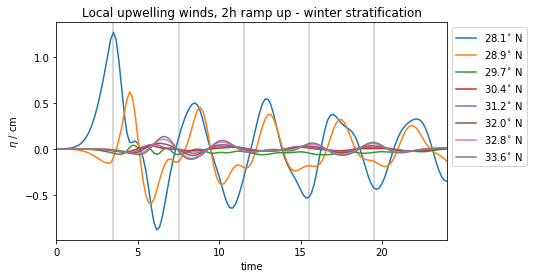

In [53]:
fig, (ax1) = plt.subplots(1,1, figsize=(7,4), sharey=True,sharex=True)

with Dataset(state_file1, 'r') as nbl:
    eta1 = nbl.variables['Eta'][:,lat_ind1,-12]
    time = nbl.variables['T'][:]
    eta2 = nbl.variables['Eta'][:,lat_ind2,-30]
    eta3 = nbl.variables['Eta'][:,lat_ind2+50,-104]
    eta4 = nbl.variables['Eta'][:,lat_ind2+100,-139]
    eta5 = nbl.variables['Eta'][:,lat_ind2+150,-154]
    eta6 = nbl.variables['Eta'][:,lat_ind2+200,-190]
    eta7 = nbl.variables['Eta'][:,lat_ind2+250,-211]
    eta8 = nbl.variables['Eta'][:,lat_ind2+300,-251]

etas = [eta1,eta2,eta3,eta4,eta5,eta6,eta7,eta8]
for eta,ind in zip(etas, inds):
    ax1.plot(time/3600,(eta)*100, label=r'%1.1f$^{\circ}$ N' %lat[ind])


for ii in range(5):
    ax1.axvline(3.5+(4.*ii), color='0.5', alpha=0.4)
ax1.set_ylabel('$\eta$ / cm')
ax1.set_xlabel('time')
ax1.set_xlim(0,24)
ax1.legend(bbox_to_anchor=(1,1))
ax1.set_title('Local upwelling winds, 2h ramp up - winter stratification')

3.5 0.012666054787457977
4.5 0.006192775424415334
4.666666666666667 0.00040755506240514256
5.833333333333333 0.0003610848410897452
6.0 0.0004978137863819598
6.333333333333333 0.0006224717196965102
6.5 0.0010569664849671985
6.666666666666667 0.0013521694561662745


Text(0.5, 1.0, 'Local upwelling winds, 2h ramp up - winter stratification')

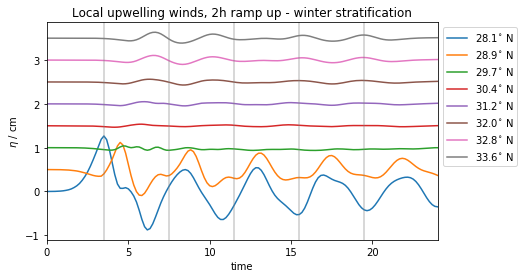

In [54]:
fig, (ax1) = plt.subplots(1,1, figsize=(7,4), sharey=True,sharex=True)

etas = [eta1,eta2,eta3,eta4,eta5,eta6,eta7,eta8]
for eta,ind, off in zip(etas, inds, range(len(etas))):
    ax1.plot(time/3600,(0.5*off)+(eta)*100, label=r'%1.1f$^{\circ}$ N' %lat[ind])
    print(time[np.argmax(eta)]/3600,np.nanmax(eta))

for ii in range(5):
    ax1.axvline(3.5+(4.*ii), color='0.5', alpha=0.4)
ax1.set_ylabel('$\eta$ / cm')
ax1.set_xlabel('time')
ax1.set_xlim(0,24)
ax1.legend(bbox_to_anchor=(1,1))
ax1.set_title('Local upwelling winds, 2h ramp up - winter stratification')

Approx speed of barotropic Kelvin wave outisde the bay: 

Distance from Lat 29.7$^{\circ}$ to 33.6$^{\circ}$ \approx 455.1 km (taking 1 deg = 111 km).
time at which max $\eta$ ocurred at 29.7$^{\circ}$ was 4.7 hr, and at 33.6$^{\circ}$ was at 6.7 hrs. So it took 2 hrs for the crest to travel 455.1 km.

$c_K$ = 455.1 km / 2 hr = **227.55 km/h**

(Speed for the Kelvin wave in the 1000 m bathymetry is 206.9 km/h)

### Animation

In [55]:
def plot_field(ax,tt,lon,lat,eta,time,mask,U,V,clab,cmap,vmin=-0.6, vmax=0.6, fld='ssh',dt=16):
    ax.set_facecolor('tan')
    pc = ax.contourf(lon,lat, np.ma.masked_array(eta,mask=mask[zz,:,:]),20,
                     cmap=cmap, vmin=vmin, vmax=vmax)
    
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    if fld == 'ssh':
        cbar_ax = fig.add_axes([0.35, 0.125, 0.022, 0.755]) 
        cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
                          cax=cbar_ax, orientation='vertical', 
                          format='%1.2f')
    elif fld =='V': 
        cbar_ax = fig.add_axes([0.88, 0.125, 0.022, 0.755])
        cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
                          cax=cbar_ax, orientation='vertical', 
                          format='%1.2f')
        
    else:
        pass
        
        
    UU = np.ma.masked_array(U,mask=mask[zz,:,:])
    VV = np.ma.masked_array(V,mask=mask[zz,:,:])
    q = ax.quiver(lon[::dt],lat[::dt],UU[::dt,::dt],VV[::dt,::dt], scale=1)
    #ax.quiverkey(q, X=0.7, Y=0.85, U=0.5,
    #             label='0.5 m s$^{-1}$', labelpos='E')
    ax.set_title('%s at %1.1f h'%(clab,time[tt]/3600))
    ax.set_aspect(1)
    return(ax)

def init():
    tt=0
    T,Uvel,Vvel = svb.get_snapshot(state_file1, tt, 0)
    eta = svb.get_ssh(state_file1, tt)
    U, V = svb.unstagger(Uvel,Vvel)
    axx= plot_field(ax1,tt,lon,lat,eta*100,time,mask,U,V,cmap=cmap, clab=clab,vmin=-1, vmax=1,fld='ssh')
    axxx = plot_field(ax2,tt,lon,lat,U*100,time,mask,U,V,cmap=cmap2, clab=clab2, vmin=-5, vmax=5, fld='U')
    axxxx = plot_field(ax3,tt,lon,lat,V*100,time,mask,U,V,cmap=cmap2, clab=clab3, vmin=-5, vmax=5, fld='V')
    ax1.set_xlabel('lon')
    ax1.set_ylabel('lat')
    ax2.set_xlabel('lon')
    ax3.set_xlabel('lon')
    ax2.set_yticks([])
    ax3.set_yticks([])
def animate(tt):
    T,Uvel,Vvel = svb.get_snapshot(state_file1, tt, 0)
    U, V = svb.unstagger(Uvel,Vvel)
    eta = svb.get_ssh(state_file1, tt)
    axx = plot_field(ax1,tt,lon,lat,eta*100,time,mask,U,V,cmap=cmap, clab=clab,vmin=-1, vmax=1, fld='ssh')
    axxx = plot_field(ax2,tt,lon,lat,U*100,time,mask,U,V,cmap=cmap2, clab=clab2, vmin=-5, vmax=5, fld='U')
    axxxx = plot_field(ax3,tt,lon,lat,V*100,time,mask,U,V,cmap=cmap2, clab=clab3, vmin=-5, vmax=5, fld='V')
    ax1.set_xlabel('lon')
    ax1.set_ylabel('lat')
    ax2.set_xlabel('lon')
    ax3.set_xlabel('lon')
    ax2.set_yticks([])
    ax3.set_yticks([])

In [56]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=2, metadata=dict(artist='Me'), bitrate=1800)

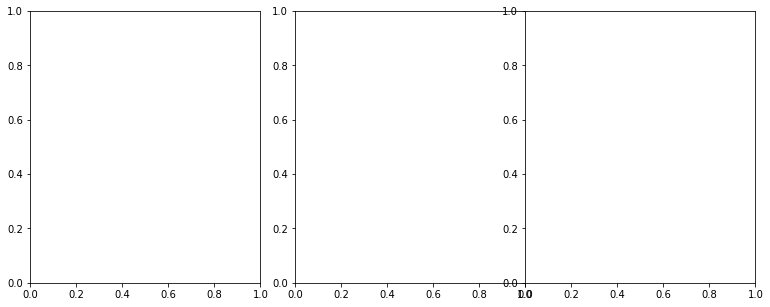

In [57]:
cmap=cmo.cm.delta
clab=r'Free surface (cm)'

cmap2=cmo.cm.balance
clab2=r'U (cm s$^{-1}$)'
clab3=r'V (cm s$^{-1}$)'

fig = plt.figure(figsize=(13,5))
gs = GridSpec(1,2, width_ratios=[1,2], wspace=0.1)
gs1 =GridSpecFromSubplotSpec(1, 2, subplot_spec=gs[1], wspace=0)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs1[0])
ax3 = fig.add_subplot(gs1[1])

# Uncomment lines below to run and save animation
# anim = animation.FuncAnimation(fig, animate, init_func=init,blit=False, frames=100, repeat=False)
# anim.save('01_winter_5000m.mp4', writer=writer)

### Filter Kelvin wave

5.7870370370370366e-05 0.0008333333333333333
5.7870370370370366e-05 0.0008333333333333333
1.1574074074074073e-05 0.0008333333333333333
5.7870370370370366e-05 0.0008333333333333333
5.7870370370370366e-05 0.0008333333333333333
5.7870370370370366e-05 0.0008333333333333333
5.7870370370370366e-05 0.0008333333333333333
5.7870370370370366e-05 0.0008333333333333333


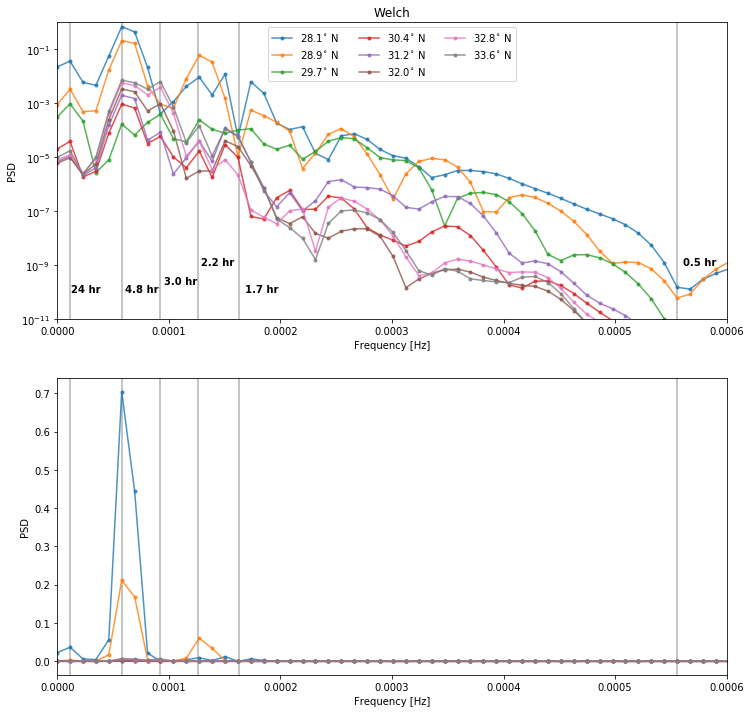

In [78]:
samp_freq = len(time)/np.max(time) # Hz
fig,(ax,ax2) = plt.subplots(2,1,figsize=(12,12))

for axx in ax,ax2:
    # Useful freq to period indicators
    axx.axvline(1/(4.8*3600), color='k', alpha=0.3, linestyle='-') # 4.8 hr - max PSD - Kelvin wave
    axx.axvline(1/(3.*3600), color='k', alpha=0.3, linestyle='-') # 3 hr - cutoff period
    axx.axvline(1/(2.2*3600), color='k', alpha=0.3, linestyle='-') # 2.4 hr 
    axx.axvline(1/(1.7*3600), color='k', alpha=0.3, linestyle='-') # 1.2 hr 
    axx.axvline(1/(0.5*3600), color='k', alpha=0.3, linestyle='-') # 0.5 hr 
    axx.axvline(1/(24*3600), color='k', alpha=0.3, linestyle='-') # 24 hr 
ax.text(1/((4.8-0.2)*3600),1E-10,'4.8 hr', fontweight='bold')
ax.text(1/((3.-0.1)*3600),2E-10,'3.0 hr', fontweight='bold')
ax.text(1/((2.2-0.05)*3600),1E-9,'2.2 hr', fontweight='bold')
ax.text(1/((1.7-0.05)*3600),1E-10,'1.7 hr', fontweight='bold')
ax.text(1/((0.5-0.005)*3600),1E-9,'0.5 hr', fontweight='bold')
ax.text(1/((24-1)*3600),1E-10,'24 hr', fontweight='bold')
   
for eta,ind in zip(etas,inds):
    freq_per, Pxx_den_per = signal.welch(eta, samp_freq, detrend='constant')
    #freq_per, Pxx_den_per = signal.periodogram(eta, samp_freq, detrend='constant')
    ax.semilogy(freq_per, Pxx_den_per,'.-', alpha=0.8, label=r'%1.1f$^{\circ}$ N' %lat[ind])
    ax2.plot(freq_per, Pxx_den_per, '.-',alpha=0.8, label=r'%1.1f$^{\circ}$ N' %lat[ind])
    print(freq_per[np.argmax(Pxx_den_per)], np.max(freq_per))
    ax.set_ylabel('PSD')
    ax.set_ylim(1E-11,1)
    ax2.set_ylabel('PSD')
    ax.set_xlim(0,0.0006)
    ax2.set_xlim(0,0.0006)
    
    ax.set_xlabel('Frequency [Hz]')
    ax2.set_xlabel('Frequency [Hz]')
    ax.set_title('Welch')
    ax.legend(ncol=3)
    

In [79]:
from scipy.signal import butter, filtfilt

def butter_highpass(higcut, fs, order=5):
    nyq = 0.5 * fs
    high = higcut / nyq
    b, a = butter(order, high, btype='high')
    return b, a


def butter_highpass_filter(data, highcut, fs, order=5):
    b, a = butter_highpass(highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

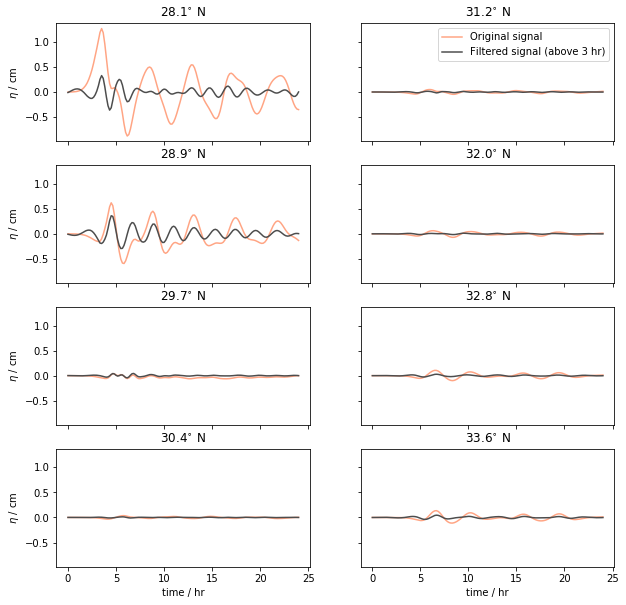

In [80]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(4, 2, figsize=(10,10), 
                                                              sharex=True, sharey=True) 
axs = [ax1,ax3,ax5,ax7,ax2,ax4,ax6,ax8]   

# Sample rate and desired cutoff frequencies (in Hz).
fs = samp_freq
freq = 1/(3.0*3600)
highcut = freq

for eta, ind, ax in zip(etas, inds, axs):
    eta_filt = butter_highpass_filter(eta, highcut, fs, order=5)
    ax.plot(time/3600,eta*100, alpha=0.7, color='coral', label='Original signal')
    ax.plot(time/3600,eta_filt*100 , color='0.3', label='Filtered signal (above %g hr)' % (1/(freq*3600)))
    ax.set_title(r'%1.1f$^{\circ}$ N' %lat[ind])

ax2.legend()
    
for ax in [ax1,ax3,ax5,ax7]:
    ax.set_ylabel(r'$\eta$ / cm')
for ax in [ax7, ax8]:
    ax.set_xlabel('time / hr')
    

Text(0.5, 0, 'time / hr')

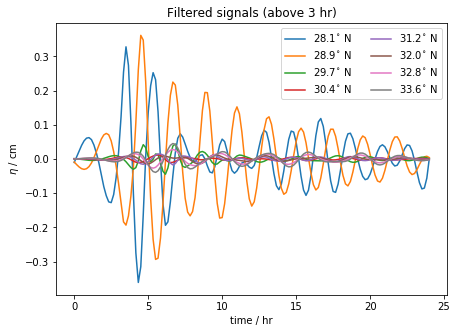

In [81]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
# Sample rate and desired cutoff frequencies (in Hz).
fs = samp_freq
freq = 1/(3.0*3600)
highcut = freq

for eta, ind in zip(etas, inds):
    eta_filt = butter_highpass_filter(eta, highcut, fs, order=5)
    ax.plot(time/3600,eta_filt*100, label=r'%1.1f$^{\circ}$ N' %lat[ind])

ax.set_title('Filtered signals (above %g hr)' % (1/(freq*3600)))
ax.legend(ncol=2)
ax.set_ylabel(r'$\eta$ / cm')
ax.set_xlabel('time / hr')

0.00015046296296296295 0.0008333333333333333
0.0001273148148148148 0.0008333333333333333
0.0001273148148148148 0.0008333333333333333
0.00015046296296296295 0.0008333333333333333
0.00015046296296296295 0.0008333333333333333
9.259259259259259e-05 0.0008333333333333333
9.259259259259259e-05 0.0008333333333333333
9.259259259259259e-05 0.0008333333333333333


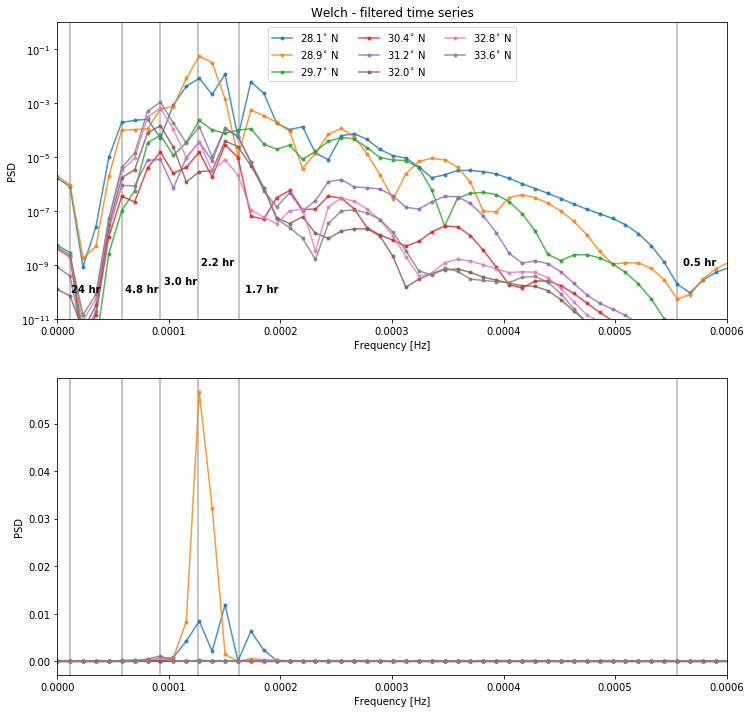

In [82]:
samp_freq = len(time)/np.max(time) # Hz
fig,(ax,ax2) = plt.subplots(2,1,figsize=(12,12))

for axx in ax,ax2:
    # Useful freq to period indicators
    axx.axvline(1/(4.8*3600), color='k', alpha=0.3, linestyle='-') # 4.8 hr - max PSD - Kelvin wave
    axx.axvline(1/(3.*3600), color='k', alpha=0.3, linestyle='-') # 3 hr - cutoff period
    axx.axvline(1/(2.2*3600), color='k', alpha=0.3, linestyle='-') # 2.4 hr 
    axx.axvline(1/(1.7*3600), color='k', alpha=0.3, linestyle='-') # 1.2 hr 
    axx.axvline(1/(0.5*3600), color='k', alpha=0.3, linestyle='-') # 0.5 hr 
    axx.axvline(1/(24*3600), color='k', alpha=0.3, linestyle='-') # 24 hr 
ax.text(1/((4.8-0.2)*3600),1E-10,'4.8 hr', fontweight='bold')
ax.text(1/((3.-0.1)*3600),2E-10,'3.0 hr', fontweight='bold')
ax.text(1/((2.2-0.05)*3600),1E-9,'2.2 hr', fontweight='bold')
ax.text(1/((1.7-0.05)*3600),1E-10,'1.7 hr', fontweight='bold')
ax.text(1/((0.5-0.005)*3600),1E-9,'0.5 hr', fontweight='bold')
ax.text(1/((24-1)*3600),1E-10,'24 hr', fontweight='bold')
   
for eta,ind in zip(etas,inds):
    eta_filt = butter_highpass_filter(eta, highcut, fs, order=5)
    freq_per, Pxx_den_per = signal.welch(eta_filt, samp_freq, detrend='constant')
    #freq_per, Pxx_den_per = signal.periodogram(eta, samp_freq, detrend='constant')
    ax.semilogy(freq_per, Pxx_den_per,'.-', alpha=0.8, label=r'%1.1f$^{\circ}$ N' %lat[ind])
    ax2.plot(freq_per, Pxx_den_per, '.-',alpha=0.8, label=r'%1.1f$^{\circ}$ N' %lat[ind])
    print(freq_per[np.argmax(Pxx_den_per)], np.max(freq_per))
    ax.set_ylabel('PSD')
    ax.set_ylim(1E-11,1)
    ax2.set_ylabel('PSD')
    ax.set_xlim(0,0.0006)
    ax2.set_xlim(0,0.0006)
    
    ax.set_xlabel('Frequency [Hz]')
    ax2.set_xlabel('Frequency [Hz]')
    ax.set_title('Welch - filtered time series')
    ax.legend(ncol=3)
    

Text(0.5, 0, 'time / hr')

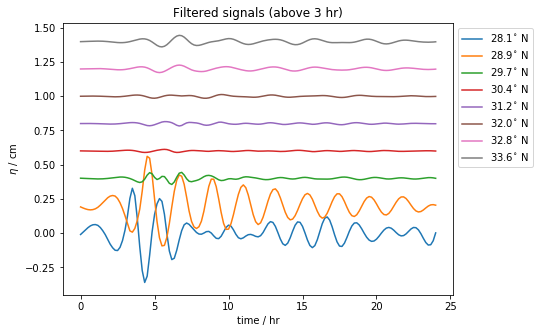

In [83]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
# Sample rate and desired cutoff frequencies (in Hz).
fs = samp_freq
freq = 1/(3.0*3600)
highcut = freq

for eta, ind, ii in zip(etas, inds, range(len(inds))):
    eta_filt = butter_highpass_filter(eta, highcut, fs, order=5)
    ax.plot(time/3600,(ii*0.2)+eta_filt*100, label=r'%1.1f$^{\circ}$ N' %lat[ind])

ax.set_title('Filtered signals (above %g hr)' % (1/(freq*3600)))
ax.legend(ncol=1, bbox_to_anchor=(1,1))
ax.set_ylabel(r'$\eta$ / cm')
ax.set_xlabel('time / hr')

### Vertical velocity at 500 m  
See stations in notebook internal_waves

In [107]:
lon_ind = 255
lat_ind1 = 70
lat_ind2 = 120
lon_inds = [280,200,200,160,140,130,100,80]
lat_inds = [lat_ind1,lat_ind1, lat_ind2, lat_ind2+50,
            lat_ind2+100, lat_ind2+150, lat_ind2+200, lat_ind2+250]

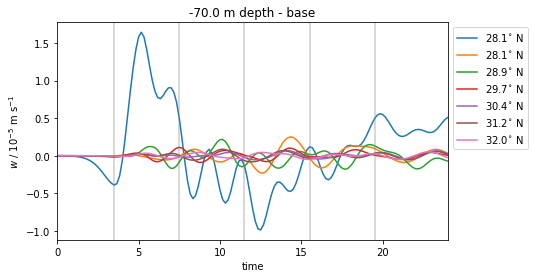

1.1574074074074073e-05 0.0008333333333333333
8.101851851851852e-05 0.0008333333333333333
0.0001273148148148148 0.0008333333333333333
8.101851851851852e-05 0.0008333333333333333
6.944444444444444e-05 0.0008333333333333333
8.101851851851852e-05 0.0008333333333333333
5.7870370370370366e-05 0.0008333333333333333


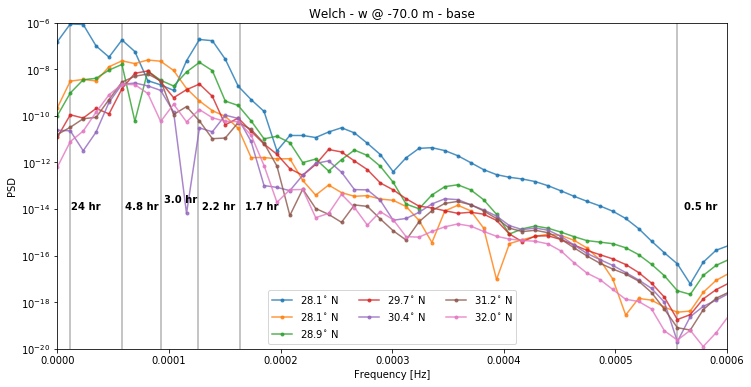

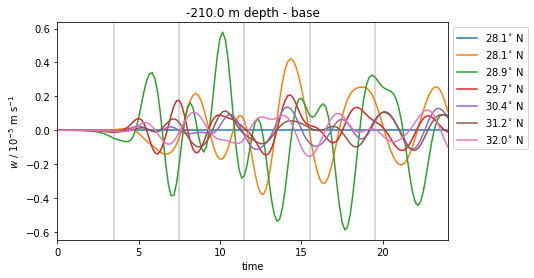

0.0 0.0008333333333333333
5.7870370370370366e-05 0.0008333333333333333
5.7870370370370366e-05 0.0008333333333333333
6.944444444444444e-05 0.0008333333333333333
8.101851851851852e-05 0.0008333333333333333
5.7870370370370366e-05 0.0008333333333333333
5.7870370370370366e-05 0.0008333333333333333


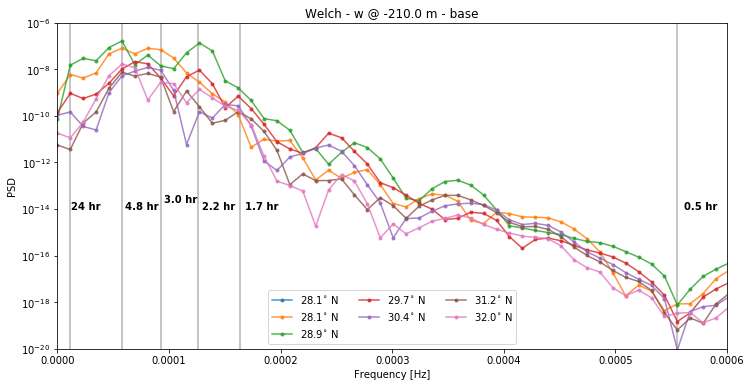

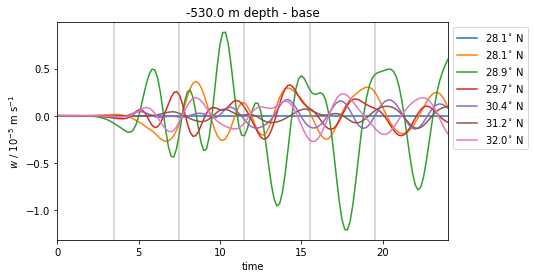

0.0 0.0008333333333333333
5.7870370370370366e-05 0.0008333333333333333
5.7870370370370366e-05 0.0008333333333333333
6.944444444444444e-05 0.0008333333333333333
8.101851851851852e-05 0.0008333333333333333
5.7870370370370366e-05 0.0008333333333333333
5.7870370370370366e-05 0.0008333333333333333


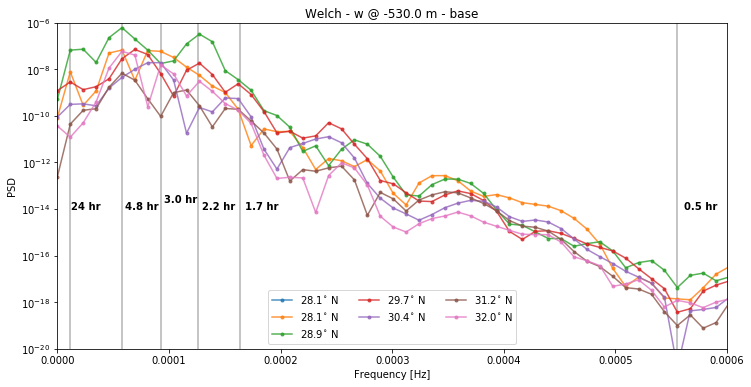

In [109]:
for zz in [7, 21, 43]:
    fig1, (ax1) = plt.subplots(1,1, figsize=(7,4), sharey=True,sharex=True)
    with Dataset(state_file1, 'r') as nbl:
        w1 = nbl.variables['W'][:,zz,lat_inds[0],lon_inds[0]]
        time = nbl.variables['T'][:]
        w2 = nbl.variables['W'][:,zz,lat_inds[1],lon_inds[1]]
        w3 = nbl.variables['W'][:,zz,lat_inds[2],lon_inds[2]]
        w4 = nbl.variables['W'][:,zz,lat_inds[3],lon_inds[3]]
        w5 = nbl.variables['W'][:,zz,lat_inds[4],lon_inds[4]]
        w6 = nbl.variables['W'][:,zz,lat_inds[5],lon_inds[5]]
        w7 = nbl.variables['W'][:,zz,lat_inds[6],lon_inds[6]]
        w8 = nbl.variables['W'][:,zz,lat_inds[7],lon_inds[7]]

    ws = [w1,w2,w3,w4,w5,w6,w7]
    for w,ind in zip(ws, lat_inds):
        ax1.plot(time/3600,(w)*1E5, label=r'%1.1f$^{\circ}$ N' %lat[ind])

    for ii in range(5):
        ax1.axvline(3.5+(4.*ii), color='0.5', alpha=0.4)
    ax1.set_ylabel('$w$ / 10$^{-5}$ m s$^{-1}$')
    ax1.set_xlabel('time')
    ax1.set_xlim(0,24)
    ax1.legend(bbox_to_anchor=(1,1))
    ax1.set_title('%1.1f m depth - base' %(Zl[zz]))
    plt.show()
    #-----
    
    samp_freq = len(time)/np.max(time) # Hz
    fig2,(ax) = plt.subplots(1,1,figsize=(12,6))

    
    # Useful freq to period indicators
    ax.axvline(1/(4.8*3600), color='k', alpha=0.3, linestyle='-') # 4.8 hr - max PSD - Kelvin wave
    ax.axvline(1/(3.*3600), color='k', alpha=0.3, linestyle='-') # 3 hr - cutoff period
    ax.axvline(1/(2.2*3600), color='k', alpha=0.3, linestyle='-') # 2.4 hr 
    ax.axvline(1/(1.7*3600), color='k', alpha=0.3, linestyle='-') # 1.2 hr 
    ax.axvline(1/(0.5*3600), color='k', alpha=0.3, linestyle='-') # 0.5 hr 
    ax.axvline(1/(24*3600), color='k', alpha=0.3, linestyle='-') # 24 hr 
    ax.text(1/((4.8-0.2)*3600),1E-14,'4.8 hr', fontweight='bold')
    ax.text(1/((3.-0.1)*3600),2E-14,'3.0 hr', fontweight='bold')
    ax.text(1/((2.2-0.05)*3600),1E-14,'2.2 hr', fontweight='bold')
    ax.text(1/((1.7-0.05)*3600),1E-14,'1.7 hr', fontweight='bold')
    ax.text(1/((0.5-0.005)*3600),1E-14,'0.5 hr', fontweight='bold')
    ax.text(1/((24-1)*3600),1E-14,'24 hr', fontweight='bold')

    for w,ind in zip(ws,lat_inds):
        freq_per, Pxx_den_per = signal.welch(w, samp_freq, detrend='constant')
        #freq_per, Pxx_den_per = signal.periodogram(eta, samp_freq, detrend='constant')
        ax.semilogy(freq_per, Pxx_den_per,'.-', alpha=0.8, label=r'%1.1f$^{\circ}$ N' %lat[ind])
        print(freq_per[np.argmax(Pxx_den_per)], np.max(freq_per))
        ax.set_ylabel('PSD')
        #ax.set_ylim(1E-11,1)
        ax.set_xlim(0,0.0006)
        ax.set_ylim(1E-20, 1E-6)
        ax.set_xlabel('Frequency [Hz]')
        ax.set_title('Welch - w @ %1.1f m - base' %Zl[zz])
        ax.legend(ncol=3)
    plt.show()